In [74]:
import pandas as pd
df = pd.read_csv('/Users/phuong/Documents/AAAI_Project/All_Articles.csv',encoding ='latin1')
df.head()

,PMID,Article Title,Abstract,Publication Type,Methods Section,First Label,Second Label,Third Label,hydroxymethylglutaryl,acetaminophen,...,tramadol,trazodone,triazolam,valproate,venlafaxine,verapamil,voriconazole,warfarin,ziprasidone,zolpidem
0,8646822,A kinetic and dynamic study of oral alprazolam...,To assess the possible involvement of CYP3A4 i...,Clinical Trial ;Journal Article ;Randomized Co...,methods subjects twelve unrelated healthy male...,DDI Clinical Trial,RCT DDI Clinical Trial,RCT DDI Clinical Trial,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8453848,A potentially hazardous interaction between er...,Interaction between erythromycin and midazolam...,Clinical Trial ;Journal Article ;Randomized Co...,material and methods study design orally admin...,DDI Clinical Trial,RCT DDI Clinical Trial,RCT DDI Clinical Trial,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23210726,A semi-mechanistic absorption model to evaluat...,The aim of this study was to develop a PK/PD m...,Journal Article ;Randomized Controlled Trial ;...,methods ten healthy male volunteers randomized...,DDI Clinical Trial,RCT DDI Clinical Trial,RCT DDI Clinical Trial,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11936570,A study of the interaction potential of azithr...,Atorvastatin is a common option among the HMG-...,"Clinical Trial ;Clinical Trial, Phase I ;Compa...",materials and methods this randomized open lab...,DDI Clinical Trial,RCT DDI Clinical Trial,RCT DDI Clinical Trial,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1387301,Absolute bioavailability of clarithromycin aft...,The absolute bioavailability of clarithromycin...,Clinical Trial ;Comparative Study ;Journal Art...,clarithromycin new 14 membered macrolide antim...,PK Trial,PK Trial,PK Trial,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
from io import StringIO

col = ['Article Title','Abstract','Methods Section','First Label','Second Label',"Third Label"]
df = df[col]

#generate categorize_id level 1 based on First Label
df.columns = ['Article Title','Abstract','Methods Section','First Label','Second Label',"Third Label"]
df['category_id_1'] = df['First Label'].factorize()[0]
category_id_df = df[['First Label', 'category_id_1']].drop_duplicates().sort_values('category_id_1')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id_1', 'First Label']].values)

#generate categorize_id level 2 based on Second Label
df['category_id_2'] = df['Second Label'].factorize()[0]
category_id_df_2 = df[['Second Label', 'category_id_2']].drop_duplicates().sort_values('category_id_2')
category_to_id_2 = dict(category_id_df_2.values)
id_to_category_2 = dict(category_id_df_2[['category_id_2', 'Second Label']].values)

#generate categorize_id level 3 based on Second Label
df['category_id_3'] = df['Third Label'].factorize()[0]
category_id_df_3 = df[['Third Label', 'category_id_3']].drop_duplicates().sort_values('category_id_3')
category_to_id_3 = dict(category_id_df_3.values)
id_to_category_3 = dict(category_id_df_3[['category_id_3', 'Third Label']].values)

df.head(100)

df.to_excel('/Users/phuong/Documents/AAAI_Project/All_Articles_Processed.xls', encoding='utf-8')

In [76]:
#Read the drug entities features
df1 = pd.read_csv('/Users/phuong/Documents/AAAI_Project/All_Drug_Entities_Features.csv',encoding ='latin1')

# 'Genotyped PK Trial':
  . Most correlated bigrams:
. gg
. dna
. cyp3a5
. snp
. hmem
. haplotyp
. ampli
. 11187g
. perphenazin
. tc
. primer
. 388a
. polymorph
. genet
. allel
. 521t
. genotyp
. slco1b1
. 1b
. 1a
# 'Non RCT Clinical Trial':
  . Most correlated bigrams:
. venlafaxin
. 2005
. 10
. 30
. 36
. 2000
. concentrationðtim
. had
. conþdenc
. clozapin
. from
. þrst
. signiþc
. ani
. as
. quetiapin
. at
. through
. until
. befor
# 'Non RCT Parallel Clinical Trial':
  . Most correlated bigrams:
. forum
. intub
. icu
. outreach
. output
. team
. uoxetin
. 300mg
. ekg
. anaesthesia
. aucinf
. dmi
. dissip
. mid
. 1ohmid
. 4ohmid
. inh
. 75mg
. dmr
. nfz
# 'PK Trial':
  . Most correlated bigrams:
. anti
. evacu
. 10h
. lag
. mycot
. hocpz
. 149
. dayx
. c1
. eaten
. uphenazin
. akaik
. cstrip
. cpz
. cuntil
. fit
. nonlin
. hydroxyclarithromycin
. accumul
. elder
# 'Phenotyped PK Trial':
  . Most correlated bigrams:
. nglml
. nch3
. ch2
. norway
. olunt
. undetect
. ereshefski
. gmol

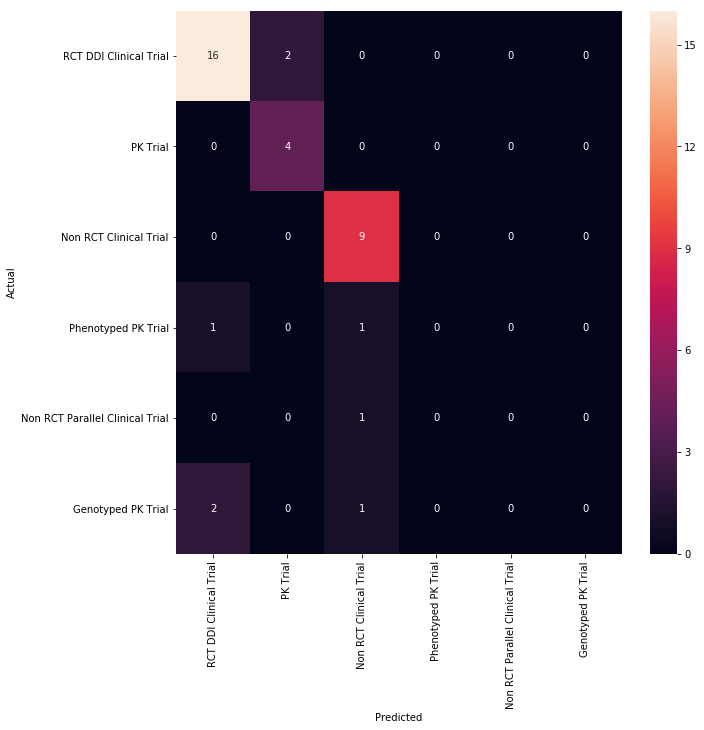

In [80]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')

# SVM Model with bigrams taken from Abstract, Article Title, & Methods Section text
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.utils import class_weight
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
from scipy.sparse import hstack
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from collections import defaultdict
import pickle
from sklearn.pipeline import Pipeline


stemmer = SnowballStemmer('english', ignore_stopwords=False)

class StemmedTfidfVectorizer(TfidfVectorizer):    
    def __init__(self, stemmer, *args, **kwargs):
        super(StemmedTfidfVectorizer, self).__init__(*args, **kwargs)
        self.stemmer = stemmer
        
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: (self.stemmer.stem(word) for word in analyzer(doc.replace('\n', ' ')))

###MAIN PROGRAM###
#put labels
labels_level_1 = df.category_id_1
labels_level_2 = df.category_id_2
labels_level_3 = df.category_id_3

#Get tfidf from Title. Abstract, Methods Section
# vectorizer = CountVectorizer(ngram_range=(2,2))
# vectorizer = TfidfVectorizer()
text = df['Abstract'] + df['Article Title'] + df['Methods Section']
tfidf = StemmedTfidfVectorizer(stemmer=stemmer, sublinear_tf=True, ngram_range=(1, 1))
# tfidf = TfidfVectorizer(ngram_range=(2, 2))
# features = tfidf.fit_transform(text).toarray()
features_fit = tfidf.fit(text)
features = features_fit.transform(text)

labels = df.category_id_3

N= 20
for categorize_name, category_id in sorted(category_to_id_3.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    print ("# '{}':".format(categorize_name))
    print ("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# # X_train_dtm = bigram_features
# # for column in df1.columns[1:]:
# #     X_train_dtm = hstack((X_train_dtm,np.array(df1[column])[:,None])).tocsr()

# X_new = SelectKBest(chi2, k=5000).fit_transform(features, labels_level_3)    
chi_squarer_multiclass = SelectKBest(chi2, k=5000)

#Train multi-class SVM model 
X_train, X_test, y_train, y_test,  = train_test_split(features, labels_level_3, stratify = labels_level_3, test_size=0.2, random_state = 0)
model_multiclass = SVC(kernel='linear', class_weight='balanced')
clf_pipe_multiclass = Pipeline([('chi_sq', chi_squarer_multiclass), ('model', model_multiclass)])
clf_multiclass = clf_pipe_multiclass.fit(X_train, y_train)
predictions_multiclass = clf_multiclass.predict(X_test)


#Print Accurancy, ROC AUC, F1 Scores, Recall, Precision)
print ('Accuracy:', accuracy_score(y_test, predictions_multiclass))
print ('Precision:', precision_score(y_test, predictions_multiclass,average='weighted'))
print ('Recall:', recall_score(y_test, predictions_multiclass,average='weighted'))
print ('F1 score:', f1_score(y_test, predictions_multiclass,average='weighted'))
print (classification_report(y_test,predictions_multiclass))

conf_mat = confusion_matrix(y_test, predictions_multiclass)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df_3['Third Label'].values, yticklabels=category_id_df_3['Third Label'].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
        
filename_multiclass_classifier = '/Users/phuong/Documents/AAAI_Project/Models/model_multiclass_classifier.sav'
pickle.dump(clf_multiclass, open(filename_multiclass_classifier, 'wb'))

In [81]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.utils import class_weight
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
from scipy.sparse import hstack
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from collections import defaultdict
from nltk.stem.snowball import SnowballStemmer
from nltk import WordNetLemmatizer, pos_tag, word_tokenize
from nltk.corpus import wordnet
import pickle
from sklearn.pipeline import Pipeline
    
       
############MAIN PROGRAM#############
stemmer = SnowballStemmer('english', ignore_stopwords=False)

class StemmedTfidfVectorizer(TfidfVectorizer):    
    def __init__(self, stemmer, *args, **kwargs):
        super(StemmedTfidfVectorizer, self).__init__(*args, **kwargs)
        self.stemmer = stemmer
        
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: (self.stemmer.stem(word) for word in analyzer(doc.replace('\n', ' ')))


#Get unigram from Title. Abstract, Methods Section
text = df['Abstract'] + df['Article Title'] + df['Methods Section']
vectorizer = StemmedTfidfVectorizer(stemmer=stemmer, sublinear_tf=True, ngram_range=(1, 1))
X_train_dtm_fit_1 = vectorizer.fit(text)
X_train_dtm = X_train_dtm_fit_1.transform(text)
   
labels_level_1 = df.category_id_1
labels_level_2 = df.category_id_2
labels_level_3 = df.category_id_3

skf = StratifiedKFold(n_splits=5)
n_folds = skf.get_n_splits(X_train_dtm,labels_level_1)

level_1_accuracies = 0
level_1_roc_auc_scores =0
level_1_precisions =0
level_1_recalls =0
level_1_f1s =0

level2_DDI_accuracies = 0
level2_DDI_roc_auc_scores = 0
level2_DDI_precisions = 0
level2_DDI_recalls = 0
level2_DDI_f1s = 0

level2_PK_accuracies = 0
level2_PK_roc_auc_scores = 0
level2_PK_precisions = 0
level2_PK_recalls = 0
level2_PK_f1s = 0

level3_PK_accuracies = 0
level3_PK_roc_auc_scores = 0
level3_PK_precisions = 0
level3_PK_recalls = 0
level3_PK_f1s = 0

level3_DDI_accuracies = 0
level3_DDI_roc_auc_scores = 0
level3_DDI_precisions = 0
level3_DDI_recalls = 0
level3_DDI_f1s = 0

for train_index, test_index in skf.split(X_train_dtm,labels_level_1):
    chi_squarer = SelectKBest(chi2, k=5000)
    
    #get the train/test sets for layer 1 classifier
    X_train, X_test =  X_train_dtm[train_index], X_train_dtm[test_index]     
    y_train, y_test = labels_level_1[train_index], labels_level_1[test_index]
    
    #fit and predict layer 1 classifier
    model = SVC(kernel='linear',class_weight="balanced")        
    clf_pipe = Pipeline([('chi_sq', chi_squarer), ('model', model)])
    clf = clf_pipe.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    #get result of layer 1 classifier
    level_1_accuracies += accuracy_score(y_test, predictions)
    level_1_roc_auc_scores += roc_auc_score(y_test,predictions)
    level_1_precisions += precision_score(y_test, predictions,average='weighted')
    level_1_recalls += recall_score(y_test, predictions,average='weighted')
    level_1_f1s += f1_score(y_test, predictions,average='weighted')
    
    ###------ LAYER 2 CLASSIFIERS------####

    #get index of data from layer 1 classifier for layer 2 classifiers (called DDI classifier & PK classifier)
    train__index_level2_DDI = (list(y_train[y_train==0].index))
    train__index_level2_PK = (list(y_train[y_train==1].index))
    test_index_level2_DDI = (list(y_test[y_test==0].index))
    test_index_level2_PK = (list(y_test[y_test==1].index))
    
    #get the train/test sets for layer 2 DDI classifier    
    X_train_level2_DDI, X_test_level2_DDI =  X_train_dtm[train__index_level2_DDI], X_train_dtm[test_index_level2_DDI]     
    y_train_level2_DDI, y_test_level2_DDI = labels_level_2[train__index_level2_DDI], labels_level_2[test_index_level2_DDI]
    
    #fit layer 2 DDI classifier model 
    model_level2_DDI = SVC(kernel='linear',class_weight="balanced")
    clf_level2_DDI = model_level2_DDI.fit(X_train_level2_DDI, y_train_level2_DDI)
    predictions_level2_DDI = clf_level2_DDI.predict(X_test_level2_DDI)
    
    #get results layer 2 DDI classifier
    level2_DDI_accuracies += accuracy_score(y_test_level2_DDI, predictions_level2_DDI)
    level2_DDI_roc_auc_scores += roc_auc_score(y_test_level2_DDI,predictions_level2_DDI)
    level2_DDI_precisions += precision_score(y_test_level2_DDI, predictions_level2_DDI,average='weighted')
    level2_DDI_recalls += recall_score(y_test_level2_DDI, predictions_level2_DDI,average='weighted')
    level2_DDI_f1s += f1_score(y_test_level2_DDI, predictions_level2_DDI,average='weighted')

    #get the train/test sets for layer 2 PK classifier
    X_train_level2_PK, X_test_level2_PK =  X_train_dtm[train__index_level2_PK], X_train_dtm[test_index_level2_PK]     
    y_train_level2_PK, y_test_level2_PK = labels_level_2[train__index_level2_PK], labels_level_2[test_index_level2_PK]    
    
    #fit layer 2 PK classifier model 
    model_level2_PK = SVC(kernel='linear',class_weight="balanced")
    clf_level2_PK = model_level2_PK.fit(X_train_level2_PK, y_train_level2_PK)
    predictions_level2_PK = clf_level2_PK.predict(X_test_level2_PK)
    
    #get results layer 2 PK classifier
    level2_PK_accuracies += accuracy_score(y_test_level2_PK, predictions_level2_PK)
    level2_PK_precisions += precision_score(y_test_level2_PK, predictions_level2_PK,average='weighted')
    level2_PK_roc_auc_scores += roc_auc_score(y_test_level2_PK,predictions_level2_PK)
    level2_PK_recalls += recall_score(y_test_level2_PK, predictions_level2_PK,average='weighted')
    level2_PK_f1s += f1_score(y_test_level2_PK, predictions_level2_PK,average='weighted')
    
    
    ###------ LAYER 3 CLASSIFIERS------####
    
    #get index of data from layer 2 classifier for layer 3 classifiers (called NonRCT classifier & PK classifier)
    train__index_level3_PK = (list(y_train_level2_PK[y_train_level2_PK==3].index))
    test_index_level3_PK = (list(y_test_level2_PK[y_test_level2_PK==3].index))
    train__index_level3_NonRCT = (list(y_train_level2_DDI[y_train_level2_DDI==2].index))
    test_index_level3_NonRCT = (list(y_test_level2_DDI[y_test_level2_DDI==2].index))
    
    #get the train/test sets for layer 3 PK Classifier (Phenotyped vs. Genotyped Trials)
    X_train_level3_PK, X_test_level3_PK =  X_train_dtm[train__index_level3_PK], X_train_dtm[test_index_level3_PK]     
    y_train_level3_PK, y_test_level3_PK = labels_level_3[train__index_level3_PK], labels_level_3[test_index_level3_PK]
    
    #fit model 
    model_level3_PK = SVC(kernel='linear',class_weight="balanced")
    clf_level3_PK = model_level3_PK.fit(X_train_level3_PK, y_train_level3_PK)
    predictions_level3_PK = clf_level3_PK.predict(X_test_level3_PK)
    
    #get results model level 3 Phenotyped vs. Genotyped Trials
    level3_PK_accuracies += accuracy_score(y_test_level3_PK, predictions_level3_PK)
    level3_PK_precisions += precision_score(y_test_level3_PK, predictions_level3_PK,average='weighted')
    level3_PK_recalls += recall_score(y_test_level3_PK, predictions_level3_PK,average='weighted')
    level3_PK_f1s += f1_score(y_test_level3_PK, predictions_level3_PK,average='weighted')

    ##get the train/test sets for layer 3 DDI Classifier (NonRCT vs. Non RCT Parallel Trial)
    X_train_level3_DDI, X_test_level3_DDI = X_train_dtm[train__index_level3_NonRCT], X_train_dtm[test_index_level3_NonRCT]     
    y_train_level3_DDI, y_test_level3_DDI = labels_level_3[train__index_level3_NonRCT], labels_level_3[test_index_level3_NonRCT]
        
    #calculate class weight for the NonRCT vs. NonRCT Parallel Trial (dataset is too small)
    from sklearn.utils.class_weight import compute_class_weight
    class_weight_list = compute_class_weight('balanced', np.unique(y_train_level3_DDI), y_train_level3_DDI)
    class_weight_customized = dict(zip(np.unique(y_train_level3_DDI), class_weight_list))
    
    #fit model 
    model_level3_DDI = SVC(kernel='linear',class_weight=class_weight_customized)
    clf_level3_DDI = model_level3_DDI.fit(X_train_level3_DDI, y_train_level3_DDI)
    predictions_level3_DDI = clf_level3_DDI.predict(X_test_level3_DDI)
    
    #get results model level 3 NonRCT vs. Non RCT Parallel Trial
    level3_DDI_accuracies += accuracy_score(y_test_level3_DDI, predictions_level3_DDI)
    level3_DDI_precisions += precision_score(y_test_level3_DDI, predictions_level3_DDI,average='weighted')
    level3_DDI_recalls += recall_score(y_test_level3_DDI, predictions_level3_DDI,average='weighted')
    level3_DDI_f1s += f1_score(y_test_level3_DDI, predictions_level3_DDI,average='weighted')
    
    #Print out the row that are misclassified
    print (test_index_level2_DDI)
    for row_index, (X_test_item, prediction, label) in enumerate(zip (X_test_level2_DDI, predictions_level2_DDI, y_test_level2_DDI)):
        if prediction != label:
            print ('Row', row_index, 'has been classified as ', prediction, 'and should be ', label)

    #Print out confusion matrix, True Positive, True Negative, False Positive, False Negative
    cm = confusion_matrix(y_test_level3_DDI, predictions_level3_DDI)
    print(cm)

# save the models to disk
filename_classifier1_1 = '/Users/phuong/Documents/AAAI_Project/Models/model_1_1.sav'
pickle.dump(clf, open(filename_classifier1_1, 'wb'))

filename_classifier2_1 = '/Users/phuong/Documents/AAAI_Project/Models/model_2_1.sav'
pickle.dump(clf_level2_DDI, open(filename_classifier2_1, 'wb'))
    
filename_classifier2_2 = '/Users/phuong/Documents/AAAI_Project/Models/model_2_2.sav'
pickle.dump(clf_level2_PK, open(filename_classifier2_2, 'wb'))
    
filename_classifier3_1 = '/Users/phuong/Documents/AAAI_Project/Models/model_3_1.sav'
pickle.dump(clf_level3_DDI, open(filename_classifier3_1, 'wb'))
 
filename_classifier3_2 = '/Users/phuong/Documents/AAAI_Project/Models/model_3_2.sav'
pickle.dump(clf_level3_PK, open(filename_classifier3_2, 'wb'))

#Print level 1 result
print ("Results of classifier level 1: DDI clinical trials vs PK trials: ")
print ('Accuracy:', level_1_accuracies/n_folds)
print ('ROC AUC: ', level_1_roc_auc_scores/n_folds)
print ('Precision:', level_1_precisions/n_folds)
print ('Recall:', level_1_recalls/n_folds)
print ('F1 score:', level_1_f1s/n_folds)
# most_informative_feature_for_binary_classification(X_vectorizer,clf,10)
print ("\n")


#Print level 2 DDI result
print ("Results of classifier level 2.1: RCT DDI clinical trials vs Non RCT clinical trials: ")
print ('Accuracy:', level2_DDI_accuracies/n_folds)
print ('ROC AUC: ', level2_DDI_roc_auc_scores/n_folds)
print ('Precision:', level2_DDI_precisions/n_folds)
print ('Recall:', level2_DDI_recalls/n_folds)
print ('F1 score:', level2_DDI_f1s/n_folds)
print ("\n")

#Print level 2 PK result
print ("Results of classifier level 2.2: PK trials vs Special PK trials: ")
print ('Accuracy:', level2_PK_accuracies/n_folds)
print ('ROC AUC: ', level2_PK_roc_auc_scores/n_folds)
print ('Precision:', level2_PK_precisions/n_folds)
print ('Recall:', level2_PK_recalls/n_folds)
print ('F1 score:', level2_PK_f1s/n_folds)
print ("\n")

#Print level 3 DDI result
print ("Results of classifier level 3.1: NonRCT DDI clinical trials vs. Non RCT Parallel clinical trials: ")
print ('Accuracy:', level3_DDI_accuracies/n_folds)
print ('ROC AUC: ', level2_PK_roc_auc_scores/n_folds)
print ('Precision:', level3_DDI_precisions/n_folds)
print ('Recall:', level3_DDI_recalls/n_folds)
print ('F1 score:', level3_DDI_f1s/n_folds)
print ("\n")

#Print level 3 PK result
print ("Results of classifier level 3.2: Genotyped trials vs Phenotyped trials: ")
print ('Accuracy:', level3_PK_accuracies/n_folds)
print ('ROC AUC: ', level2_PK_roc_auc_scores/n_folds)
print ('Precision:', level3_PK_precisions/n_folds)
print ('Recall:', level3_PK_recalls/n_folds)
print ('F1 score:', level3_PK_f1s/n_folds)
print ("\n")




[0, 1, 2, 3, 7, 8, 9, 10, 11, 12, 14, 15, 17, 18, 19, 20, 21, 23, 24, 28, 29, 30, 33, 34, 35, 36, 38, 39, 40]
Row 12 has been classified as  0 and should be  2
Row 13 has been classified as  2 and should be  0
Row 19 has been classified as  0 and should be  2
[[9 0]
 [2 0]]
[41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]
[[10]]
[72, 74, 75, 76, 77, 78, 79, 80, 81, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105]
Row 27 has been classified as  0 and should be  2
[[10  0]
 [ 1  0]]
[106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 120, 123, 126, 130, 131, 133, 134, 136, 137, 139, 140, 141, 142, 143, 144, 145]
[[7]]
[146, 152, 155, 156, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179, 180, 182, 183, 184]
Row 13 has been classified as  0 and should be  2
[[11  0]
 [ 1  0]]
Results of classifier level 1: DDI clinical trials vs PK tria

In [82]:
# Using saved models on new data to get prediction
import pandas as pd
import pickle
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
import numpy as np 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


new_df = pd.read_csv('/Users/phuong/Documents/AAAI_Project/Testing/UnknownDataForTesting.csv',encoding ='latin1')
new_df.head()

for index, row in new_df.iterrows():
    final_prediction = ""
    result_level_1 = 10
    result_level_2 = 10
    result_level_3 = 10
    
    PMID = row['PMID']
    new_text = row['Article Title'] + row['Abstract'] + row['Methods Section']
    new_text=[new_text]
    
    #multiclass classifier prediction
    new_features = vectorizer.transform(new_text)
    multiclass_model = pickle.load(open('/Users/phuong/Documents/AAAI_Project/Models/model_multiclass_classifier.sav', 'rb'))
    mutlticlass_prediction = multiclass_model.predict(new_features)

    #hierarchical classifier prediction
    new_x_dtm = vectorizer.transform(new_text)
    loaded_model_1_1 = pickle.load(open('/Users/phuong/Documents/AAAI_Project/Models/model_1_1.sav', 'rb'))
    result_level_1 = loaded_model_1_1.predict(new_x_dtm)

    if (result_level_1==0):
    #     print("Level 1 prediction: DDI Clinical Trial")
        loaded_model_2_1 = pickle.load(open('/Users/phuong/Documents/AAAI_Project/Models/model_2_1.sav', 'rb'))
        result_level_2 = loaded_model_2_1.predict(new_x_dtm)
        if (result_level_2==0):
            final_prediction = "RCT DDI Clinical Trial"
        elif(result_level_2 == 2):
    #         print("Level 2 prediction: Non-RCT DDI Clinical Trial")
            loaded_model_3_1 = pickle.load(open('/Users/phuong/Documents/AAAI_Project/Models/model_3_1.sav', 'rb'))
            result_level_3 = loaded_model_3_1.predict(new_x_dtm)
            if (result_level_3==4):
                final_prediction = "Non-RCT parallel DDI Clinical Trial"
            elif (result_level_3==2):
                final_prediction = "Non-RCT non-parallel DDI Clinical Trial"
    elif (result_level_1==1):
        loaded_model_2_2 = pickle.load(open('/Users/phuong/Documents/AAAI_Project/Models/model_2_2.sav', 'rb'))
        result_level_2 = loaded_model_2_2.predict(new_x_dtm)
        if (result_level_2==3):
            loaded_model_3_2 = pickle.load(open('/Users/phuong/Documents/AAAI_Project/Models/model_3_2.sav', 'rb'))
            result_level_3 = loaded_model_3_2.predict(new_x_dtm)
            if (result_level_3==3):
                final_prediction = "Phenotype PK Trial"
            elif (result_level_3==5):
                final_prediction = "Genotyped PK Trial"
        elif (result_level_2 == 1):
            final_prediction = "Non-polymorphic enzyme/transport PK Trial"

    print (final_prediction)
    print (mutlticlass_prediction)


Non-RCT non-parallel DDI Clinical Trial
[2]
Non-RCT non-parallel DDI Clinical Trial
[2]
Non-RCT non-parallel DDI Clinical Trial
[2]
Non-RCT non-parallel DDI Clinical Trial
[2]
Non-RCT non-parallel DDI Clinical Trial
[2]
Non-RCT non-parallel DDI Clinical Trial
[2]
Non-RCT non-parallel DDI Clinical Trial
[2]
Genotyped PK Trial
[5]
RCT DDI Clinical Trial
[0]
Genotyped PK Trial
[5]
Non-RCT non-parallel DDI Clinical Trial
[2]
Non-RCT non-parallel DDI Clinical Trial
[2]
Non-RCT non-parallel DDI Clinical Trial
[2]
Non-RCT non-parallel DDI Clinical Trial
[2]
RCT DDI Clinical Trial
[2]
RCT DDI Clinical Trial
[2]
Non-RCT non-parallel DDI Clinical Trial
[2]
Non-RCT non-parallel DDI Clinical Trial
[2]
Non-RCT non-parallel DDI Clinical Trial
[2]
RCT DDI Clinical Trial
[2]
Non-RCT non-parallel DDI Clinical Trial
[2]
Non-RCT non-parallel DDI Clinical Trial
[2]
Non-RCT non-parallel DDI Clinical Trial
[2]
Non-RCT non-parallel DDI Clinical Trial
[2]
Non-RCT non-parallel DDI Clinical Trial
[2]
Non-RCT no

In [ ]:
print ("test GitHUb")